# Term Project - Group 3
#### Kristen Celotto
#### Fouad Zayat
#### Edwin Manalaysay

# Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from pylab import *
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sns

#Displays every line from the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
credit_data = pd.read_csv('german_credit_card.csv')
credit_card_data = credit_data.copy()

In [3]:
credit_card_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

As we can see there is no missing data and all the data vlaues in each column are all integers. From this dataframe and reading the data description Creditability is the dependent variable.

In [7]:
# This shows all the mean, std, min, and max of each column
credit_card_data.describe() # this is missing the column details for Guarantors
credit_card_data['Guarantors'].describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


count    1000.000000
mean        1.145000
std         0.477706
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Guarantors, dtype: float64

### From the cell above
The dependent variable that we will be solving for is Creditability
As we can see in the cell above Creditability has a mean of 70%
Since Creditability is only 0 and 1 where 1 means good credit and 0 means bad credit it is qualitative.
70% of the people from the dataset have good credit.
We will need to randomize the data when choosing test and validation set since the data set is in order (all good credits first in the list)

# Looking at each individual column
### Account Balance

{'boxes': [<matplotlib.lines.Line2D at 0x111356ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x10a93f940>,
 'fliers': [<matplotlib.lines.Line2D at 0x10a94e5f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10a94e1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10a93f080>,
  <matplotlib.lines.Line2D at 0x10a93f518>]}

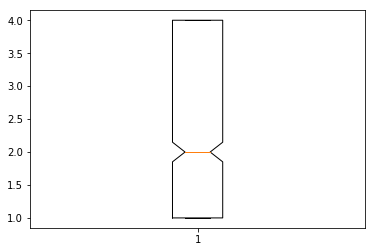

In [8]:
matplotlib.pyplot.boxplot(credit_card_data['Account Balance'], notch=True)
# Looking this plot it shows that the median is 2 and that there are no outliers.

In [9]:
# Account balance  mean is 2.577
print(credit_card_data['Account Balance'].median())
# 2 is the most common so the account balance for most of the people in the dataset is between 0 (inclusive) and 200 (exclusive)
credit_card_data.groupby(['Account Balance'])[['Account Balance']].count()
# This means that 394 people do not have a checking account

2.0


,Account Balance
Account Balance,
1,274
2,269
3,63
4,394


,Creditability
Account Balance,
1,0.507299
2,0.609665
3,0.777778
4,0.883249


Text(0,0.5,'rate')

Text(0.5,1,'Account Balance and Creditability')

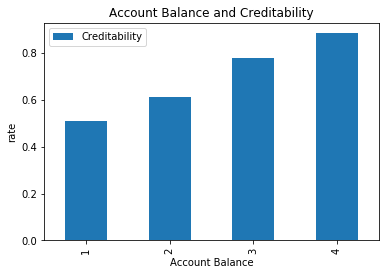

In [10]:
acct_plot = credit_card_data.pivot_table(index='Account Balance', values='Creditability')
acct_grp = credit_card_data.groupby(['Account Balance'])[['Creditability']]
acct_grp.mean()
acct_plot.plot.bar()
plt.ylabel('rate')
plt.title('Account Balance and Creditability')
plt.show()
# This shows that people with not checking account have the highest creditability rate

## Duration of Credit

{'boxes': [<matplotlib.lines.Line2D at 0x1a1778a208>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1778ac18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a177998d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a177994a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1778a358>,
  <matplotlib.lines.Line2D at 0x1a1778a7f0>]}

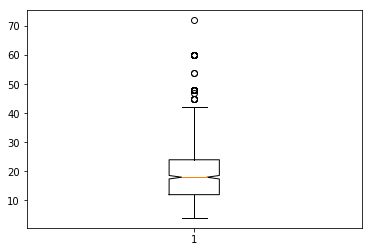

In [4]:
# Scatter plot to see if there are any outliers
matplotlib.pyplot.boxplot(credit_card_data['Duration of Credit (month)'], notch=True)

#This shows that this column contains outliers duration is more than 45 months.

In [5]:
credit_card_data['Duration of Credit (month)'].median()
# a year and a half is the most common lenght of credit and mean is 20


18.0

Text(0,0.5,'rate')

Text(0.5,1,'Duration and Creditability')

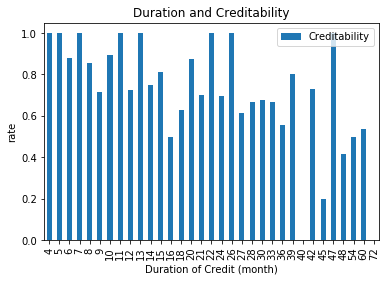

Creditability    0.708859
dtype: float64


                             Creditability
Duration of Credit (month)               
4                                1.000000
5                                1.000000
6                                0.880000
7                                1.000000
8                                0.857143
9                                0.714286
10                               0.892857
11                               1.000000
12                               0.726257
13                               1.000000
14                               0.750000
15                               0.812500
16                               0.500000
18                               0.628319
20                               0.875000
21                               0.700000
22                               1.000000
24                               0.695652
26                               1.000000
27                               0.615385
28                               0.666667
30                              

In [6]:
duration_plot = credit_card_data.pivot_table(index='Duration of Credit (month)', values='Creditability')
duration_plot.plot.bar()
plt.ylabel('rate')
plt.title('Duration and Creditability')
plt.show()
duration_plot.mean()
duration_grp = credit_card_data.groupby(['Duration of Credit (month)'])[['Creditability']]
print("\n",duration_grp.mean())

In [7]:
# bin the durations into groups to interpret the creditability between durations groups, if there is one
bins = [0,15,30,45,75]
binned_grp = pd.cut(credit_card_data['Duration of Credit (month)'], bins, labels=[1,2,3,4])
binned_accepted = pd.cut(credit_card_data[credit_card_data['Creditability']==1]['Duration of Credit (month)'], bins)
credit_card_data['Credit Duration'] = binned_grp
# print('binned accepted\n',binned_accepted)

Text(0,0.5,'rate')

Text(0.5,1,'Creditability based on Duration')

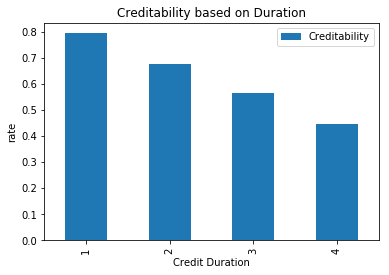

Creditability    0.62031
dtype: float64

In [8]:
duration_plot = credit_card_data.pivot_table(index='Credit Duration', values="Creditability")
duration_plot.plot.bar()
plt.ylabel('rate')
plt.title('Creditability based on Duration')
plt.show()
duration_plot.mean()

In [9]:
print("Number of customers in the credit duration")
credit_card_data.groupby(['Credit Duration'])[['Credit Duration']].count()

print("\nThe creditability rate:")
accept_grp = credit_card_data.groupby(['Credit Duration'])[['Creditability']]
accept_grp.mean()

Number of customers in the credit duration


,Credit Duration
Credit Duration,
1,431
2,396
3,108
4,65



The creditability rate:


,Creditability
Credit Duration,
1,0.793503
2,0.676768
3,0.564815
4,0.446154


this shows that cutomers with in the first group with duration from 0 to 15
has the largest number of customers in its group and it has the highest creditability rating 

## Payment Status of Previous Credit

Text(0,0.5,'rate')

Text(0.5,1,'Payment and Creditability')

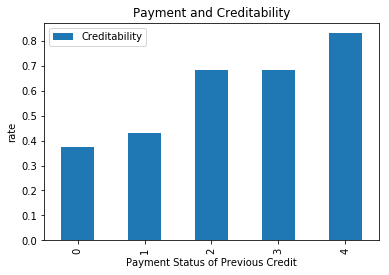


mean Creditability    0.599175
dtype: float64
median 2.0
The number of cutomers in each payment status


,Payment Status of Previous Credit
Payment Status of Previous Credit,
0,40
1,49
2,530
3,88
4,293



                                    Creditability
Payment Status of Previous Credit               
0                                       0.375000
1                                       0.428571
2                                       0.681132
3                                       0.681818
4                                       0.829352


In [18]:
payment_plot = credit_card_data.pivot_table(index='Payment Status of Previous Credit', values='Creditability')
payment_plot.plot.bar()
plt.ylabel('rate')
plt.title('Payment and Creditability')
plt.show()
print()
print('mean',payment_plot.mean())
print('median',credit_card_data['Payment Status of Previous Credit'].median())
print("The number of cutomers in each payment status")
credit_card_data.groupby(['Payment Status of Previous Credit'])[['Payment Status of Previous Credit']].count()
payment_grp = credit_card_data.groupby(['Payment Status of Previous Credit'])[['Creditability']]
print("\n",payment_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x114b816d8>],
 'caps': [<matplotlib.lines.Line2D at 0x114b8b128>,
 'fliers': [<matplotlib.lines.Line2D at 0x114b8bda0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114b8b978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114b81828>,
  <matplotlib.lines.Line2D at 0x114b81cc0>]}

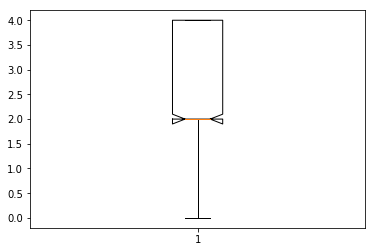

In [19]:
matplotlib.pyplot.boxplot(credit_card_data['Payment Status of Previous Credit'], notch=True)

this shows that customers that have a critical account have the highest creditability rating
and that this column does not contain any outliers

## Purpose

Text(0,0.5,'rate')

Text(0.5,1,'Purpose and Creditability')

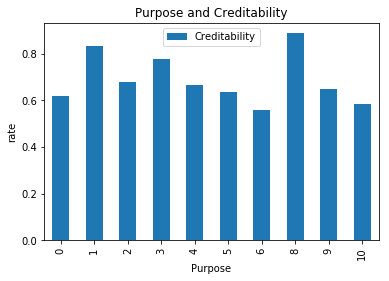

Creditability    0.689748
dtype: float64


The number of cutomers in each purpose group


,Purpose
Purpose,
0,234
1,103
2,181
3,280
4,12
5,22
6,50
8,9
9,97




          Creditability
Purpose               
0             0.619658
1             0.834951
2             0.679558
3             0.778571
4             0.666667
5             0.636364
6             0.560000
8             0.888889
9             0.649485
10            0.583333


In [10]:
purpose_plot = credit_card_data.pivot_table(index='Purpose', values='Creditability')
purpose_plot.plot.bar()
plt.ylabel('rate')
plt.title('Purpose and Creditability')
plt.show()

purpose_plot.mean()

print()
print("The number of cutomers in each purpose group")
credit_card_data.groupby(['Purpose'])[['Purpose']].count()
print()
purpose_grp = credit_card_data.groupby(['Purpose'])[['Creditability']]
print("\n",purpose_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a207f7630>],
 'caps': [<matplotlib.lines.Line2D at 0x1a207fc080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a207fccf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a207fc8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a207f7780>,
  <matplotlib.lines.Line2D at 0x1a207f7c18>]}

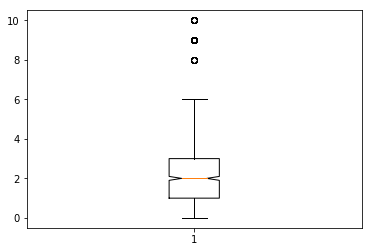

In [11]:
matplotlib.pyplot.boxplot(credit_card_data['Purpose'], notch=True)

This shows that there are outliers 8,9,10 looking at the creditability rating 8 has the higest rate,
however it is an outlier and doesn't truly represent the Retraining well. 
Hence group 1 (Used cars) and 3(Radio/Television) have a better idea for high rating with 83% and 77% respectfully.

## Credit Amount

In [12]:
cr_amt_plot = credit_card_data.pivot_table(index='Credit Amount', values='Creditability')

cr_amt_plot.mean()
cr_amt_grp = credit_card_data.groupby(['Credit Amount'])[['Creditability']]
print("\n",cr_amt_grp.mean())

Creditability    0.697003
dtype: float64


                Creditability
Credit Amount               
250                      1.0
276                      1.0
338                      1.0
339                      1.0
343                      1.0
362                      1.0
368                      1.0
385                      1.0
392                      1.0
409                      1.0
426                      1.0
428                      1.0
433                      0.0
448                      0.0
454                      1.0
458                      1.0
484                      1.0
518                      1.0
522                      1.0
571                      1.0
585                      1.0
590                      1.0
601                      1.0
609                      0.5
618                      1.0
625                      1.0
626                      0.0
629                      1.0
639                      0.0
640                      1.0
...                      ...
10974                    0.0
11054       

{'boxes': [<matplotlib.lines.Line2D at 0x1a20975e48>],
 'caps': [<matplotlib.lines.Line2D at 0x1a2097d898>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a208cc550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a208cc128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a20975f98>,
  <matplotlib.lines.Line2D at 0x1a2097d470>]}

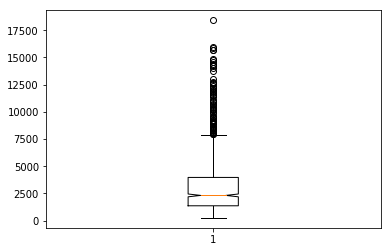

In [13]:
matplotlib.pyplot.boxplot(credit_card_data['Credit Amount'], notch=True)

In [14]:
cr_amt_bins = [200,2200,4200,6200,8200,10200,12200,14200,18500]
cr_amt_grp = pd.cut(credit_card_data['Credit Amount'], cr_amt_bins, labels=[1,2,3,4,5,6,7,8])
cr_amt_accepted = pd.cut(credit_card_data[credit_card_data['Creditability']==1]['Credit Amount'], cr_amt_bins, labels=[1,2,3,4,5,6,7,8])
credit_card_data['Credit Amount Grp'] = cr_amt_grp

Text(0,0.5,'rate')

Text(0.5,1,'Creditability based on Credit Amount')

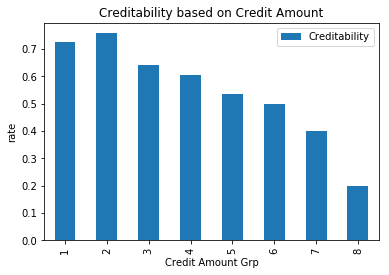

In [15]:
cr_amt_plot = credit_card_data.pivot_table(index='Credit Amount Grp', values="Creditability")
cr_amt_plot.plot.bar()
plt.ylabel('rate')
plt.title('Creditability based on Credit Amount')
plt.show()

In [16]:
print("The number of cutomers in each Credit Amount Grp")
credit_card_data.groupby(['Credit Amount Grp'])[['Credit Amount Grp']].count()
print()
cr_amt_grpby = credit_card_data.groupby(['Credit Amount Grp'])[['Creditability']]
cr_amt_grpby.mean()

The number of cutomers in each Credit Amount Grp


,Credit Amount Grp
Credit Amount Grp,
1,473
2,293
3,92
4,76
5,28
6,18
7,10
8,10


,Creditability
Credit Amount Grp,
1,0.725159
2,0.757679
3,0.641304
4,0.605263
5,0.535714
6,0.500000
7,0.400000
8,0.200000


In [17]:
cr_amt_plot

,Creditability
Credit Amount Grp,
1,0.725159
2,0.757679
3,0.641304
4,0.605263
5,0.535714
6,0.500000
7,0.400000
8,0.200000


this shows that group 2 that holds credit amount from 2200 to 4200 has the highest creditability rate of 75.8%
and this also shows that there is an obvious decrease in creditiability when the credit amounts increase

## Value Savings/Stocks

Text(0,0.5,'rate')

Text(0.5,1,'Value Savings/Stocks and Creditability')

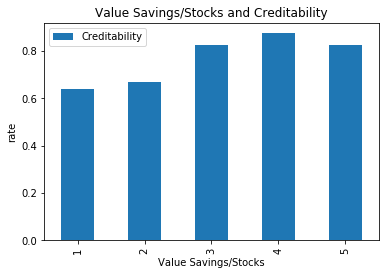

Creditability    0.689748
dtype: float64


The number of cutomers in each Value Savings/Stocks group


,Value Savings/Stocks
Value Savings/Stocks,
1,603
2,103
3,63
4,48
5,183




                       Creditability
Value Savings/Stocks               
1                          0.640133
2                          0.669903
3                          0.825397
4                          0.875000
5                          0.825137


In [18]:
sav_plot = credit_card_data.pivot_table(index='Value Savings/Stocks', values='Creditability')
sav_plot.plot.bar()
plt.ylabel('rate')
plt.title('Value Savings/Stocks and Creditability')
plt.show()

purpose_plot.mean()
print()

print("The number of cutomers in each Value Savings/Stocks group")
credit_card_data.groupby(['Value Savings/Stocks'])[['Value Savings/Stocks']].count()
print()

sav_grp = credit_card_data.groupby(['Value Savings/Stocks'])[['Creditability']]
print("\n",sav_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a2059dc50>],
 'caps': [<matplotlib.lines.Line2D at 0x1a2059dda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a204f3048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a204f3e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a2059dfd0>,
  <matplotlib.lines.Line2D at 0x1a2059d898>]}

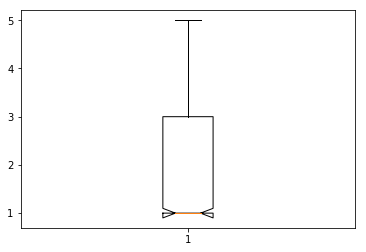

In [19]:
matplotlib.pyplot.boxplot(credit_card_data['Value Savings/Stocks'], notch=True)

This shows that there are not outliers to skew the rates and customers in group 4 has the highest rate,
but also has the lowest number of customer to get the data from.
a better understanding of this data would be customers that have
a either no saving account or a saving account above 500DM have the highest probability of getting credit

## Length of current employment

Text(0,0.5,'rate')

Text(0.5,1,'Length of current employment and Creditability')

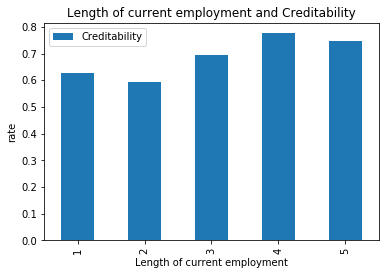

Creditability    0.687634
dtype: float64


The number of cutomers in each Length of current employment group


,Length of current employment
Length of current employment,
1,62
2,172
3,339
4,174
5,253




                               Creditability
Length of current employment               
1                                  0.629032
2                                  0.593023
3                                  0.693215
4                                  0.775862
5                                  0.747036


In [20]:
cur_emp_plot = credit_card_data.pivot_table(index='Length of current employment', values='Creditability')
cur_emp_plot.plot.bar()
plt.ylabel('rate')
plt.title('Length of current employment and Creditability')
plt.show()

cur_emp_plot.mean()

print()

print("The number of cutomers in each Length of current employment group")
credit_card_data.groupby(['Length of current employment'])[['Length of current employment']].count()
print()

cur_emp_grp = credit_card_data.groupby(['Length of current employment'])[['Creditability']]
print("\n",cur_emp_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a206ccef0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a206cc2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a206bb470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a206bbb70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a206ccd30>,
  <matplotlib.lines.Line2D at 0x1a206ccac8>]}

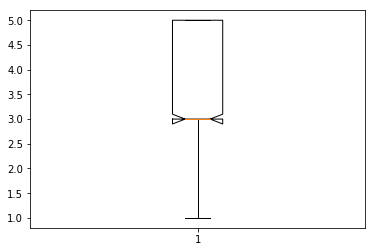

In [21]:
matplotlib.pyplot.boxplot(credit_card_data['Length of current employment'], notch=True)

This shows that there are not outliers
and customers that have their current job for 4-7years have the highest creditability rating

## Instalment percent

Text(0,0.5,'rate')

Text(0.5,1,'Instalment percent and Creditability')

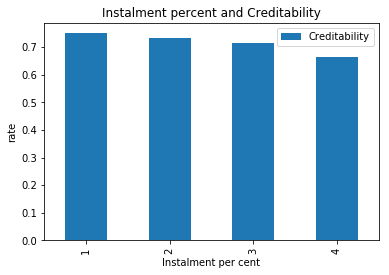

Creditability    0.715236
dtype: float64


The number of cutomers in each Instalment percent group


,Instalment per cent
Instalment per cent,
1,136
2,231
3,157
4,476




                      Creditability
Instalment per cent               
1                         0.750000
2                         0.731602
3                         0.713376
4                         0.665966


In [22]:
instalment_plot = credit_card_data.pivot_table(index='Instalment per cent', values='Creditability')
instalment_plot.plot.bar()
plt.ylabel('rate')
plt.title('Instalment percent and Creditability')
plt.show()

instalment_plot.mean()

print()
print("The number of cutomers in each Instalment percent group")
credit_card_data.groupby(['Instalment per cent'])[['Instalment per cent']].count()
print()

instalment_grp = credit_card_data.groupby(['Instalment per cent'])[['Creditability']]
print("\n",instalment_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a20c4cf98>],
 'caps': [<matplotlib.lines.Line2D at 0x1a20c599e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a20c5f6a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a20c5f278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a20c59128>,
  <matplotlib.lines.Line2D at 0x1a20c595c0>]}

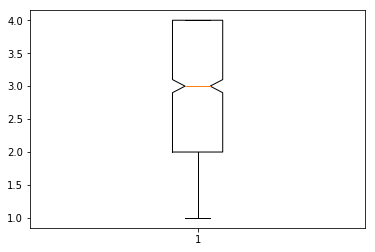

In [23]:
matplotlib.pyplot.boxplot(credit_card_data['Instalment per cent'], notch=True)

there are no outliers and that all the creditabilty rating are all very similar
slowing increasing the rate and the installment precent goes down.
This doesn't give much insight or to be useful in the regression models
since all the rates are similar and they are all around the rate the creditability is normally

## Sex & Marital Status

Text(0,0.5,'rate')

Text(0.5,1,'Sex & Marital Status and Creditability')

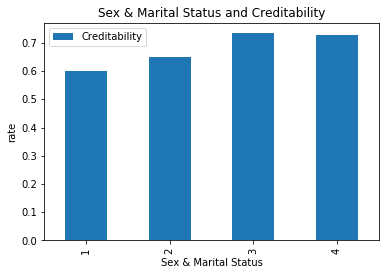

Creditability    0.677556
dtype: float64


The number of cutomers in each Sex & Marital Status group


,Sex & Marital Status
Sex & Marital Status,
1,50
2,310
3,548
4,92




                       Creditability
Sex & Marital Status               
1                          0.600000
2                          0.648387
3                          0.733577
4                          0.728261


In [27]:
status_plot = credit_card_data.pivot_table(index='Sex & Marital Status', values='Creditability')
status_plot.plot.bar()
plt.ylabel('rate')
plt.title('Sex & Marital Status and Creditability')
plt.show()

status_plot.mean()

print()
print("The number of cutomers in each Sex & Marital Status group")
credit_card_data.groupby(['Sex & Marital Status'])[['Sex & Marital Status']].count()
print()

status_grp = credit_card_data.groupby(['Sex & Marital Status'])[['Creditability']]
print("\n",status_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a211fd2e8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a211fdcf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a212059b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a21205588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a211fd438>,
  <matplotlib.lines.Line2D at 0x1a211fd8d0>]}

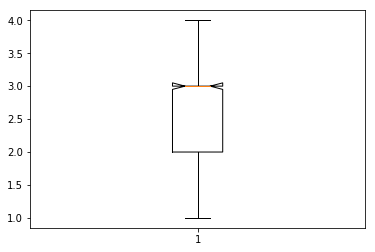

In [28]:
matplotlib.pyplot.boxplot(credit_card_data['Sex & Marital Status'], notch=True)

No outliers and single males has the highest creditability rating while divorced men have the lowest rating 

## Guarantors

Text(0,0.5,'rate')

Text(0.5,1,'Guarantors and Creditability')

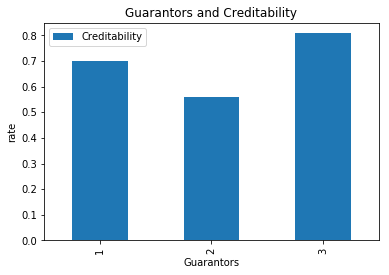

Creditability    0.689593
dtype: float64


The number of cutomers in each Guarantors group


,Guarantors
Guarantors,
1,907
2,41
3,52




             Creditability
Guarantors               
1                0.700110
2                0.560976
3                0.807692


In [29]:
guarantors_plot = credit_card_data.pivot_table(index='Guarantors', values='Creditability')
guarantors_plot.plot.bar()
plt.ylabel('rate')
plt.title('Guarantors and Creditability')
plt.show()

guarantors_plot.mean()

print()
print("The number of cutomers in each Guarantors group")
credit_card_data.groupby(['Guarantors'])[['Guarantors']].count()
print()

guarantors_grp = credit_card_data.groupby(['Guarantors'])[['Creditability']]
print("\n",guarantors_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a2106f438>],
 'caps': [<matplotlib.lines.Line2D at 0x1a211cb400>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a21078e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a211cb828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a2106f828>,
  <matplotlib.lines.Line2D at 0x1a2106feb8>]}

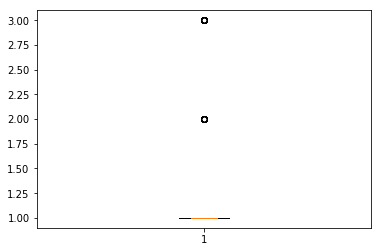

In [30]:
matplotlib.pyplot.boxplot(credit_card_data['Guarantors'], notch=True)

this shows that cusotmers outside of the first group (no guarantors and co-applicant) are outliers. 
so looking at the rating is not the best way to determine the creditability for the regression model.
most customers fall under group one and that their creditabilty rating is 70%
which is just the creditabilty rating in general.

## Duration in Current address

Text(0,0.5,'rate')

Text(0.5,1,'Duration in Current address and Creditability')

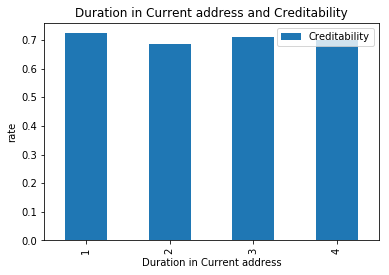

Creditability    0.704827
dtype: float64


The number of cutomers in each Duration in Current address group


,Duration in Current address
Duration in Current address,
1,130
2,308
3,149
4,413




                              Creditability
Duration in Current address               
1                                 0.723077
2                                 0.685065
3                                 0.711409
4                                 0.699758


In [31]:
address_plot = credit_card_data.pivot_table(index='Duration in Current address', values='Creditability')
address_plot.plot.bar()
plt.ylabel('rate')
plt.title('Duration in Current address and Creditability')
plt.show()

address_plot.mean()

print()
print("The number of cutomers in each Duration in Current address group")
credit_card_data.groupby(['Duration in Current address'])[['Duration in Current address']].count()
print()

address_grp = credit_card_data.groupby(['Duration in Current address'])[['Creditability']]
print("\n",address_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a20508518>],
 'caps': [<matplotlib.lines.Line2D at 0x1a20afc080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a20b02518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a20b02748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a20508f60>,
  <matplotlib.lines.Line2D at 0x1a20afc8d0>]}

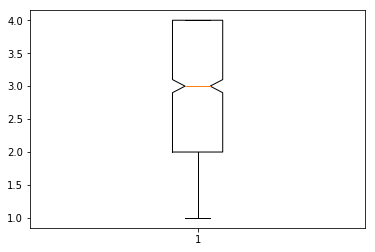

In [32]:
matplotlib.pyplot.boxplot(credit_card_data['Duration in Current address'], notch=True)

Current address has not real value since they all have the similar creditability which is the same probability for Creditiability

## Most Valuable Available asset

Text(0,0.5,'rate')

Text(0.5,1,'Most valuable available asset and Creditability')

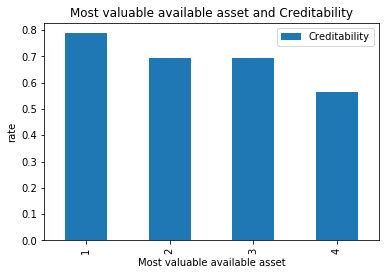

Creditability    0.684726
dtype: float64


The number of cutomers in each Most valuable available asset group


,Most valuable available asset
Most valuable available asset,
1,282
2,232
3,332
4,154




                                Creditability
Most valuable available asset               
1                                   0.787234
2                                   0.693966
3                                   0.692771
4                                   0.564935


In [33]:
asset_plot = credit_card_data.pivot_table(index='Most valuable available asset', values='Creditability')
asset_plot.plot.bar()
plt.ylabel('rate')
plt.title('Most valuable available asset and Creditability')
plt.show()

asset_plot.mean()

print()
print("The number of cutomers in each Most valuable available asset group")
credit_card_data.groupby(['Most valuable available asset'])[['Most valuable available asset']].count()
print()

asset_grp = credit_card_data.groupby(['Most valuable available asset'])[['Creditability']]
print("\n",asset_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a206b0d68>],
 'caps': [<matplotlib.lines.Line2D at 0x1a206b0f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a207a5828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a207adf60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a206b02b0>,
  <matplotlib.lines.Line2D at 0x1a206b07f0>]}

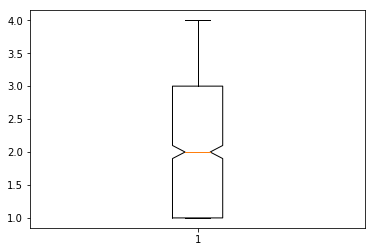

In [34]:
matplotlib.pyplot.boxplot(credit_card_data['Most valuable available asset'], notch=True)

this shows that there is no outliers and the group 1 (real estate) has the highest crediability rating

# Age

Text(0,0.5,'rate')

Text(0.5,1,'Age and Creditability')

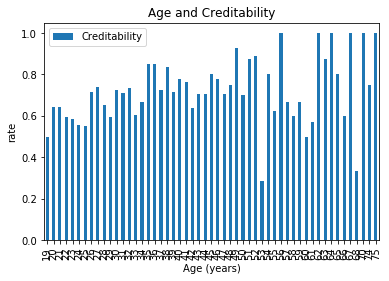

In [35]:
age_plot = credit_card_data.pivot_table(index='Age (years)', values='Creditability')
age_plot.plot.bar()
plt.ylabel('rate')
plt.title('Age and Creditability')
plt.show()
# age_plot.mean()
age_grp = credit_card_data.groupby(['Age (years)'])[['Creditability']]
# print("\n",age_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a21551cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a2155b710>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a215633c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a2155bf60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a21551e10>,
  <matplotlib.lines.Line2D at 0x1a2155b2e8>]}

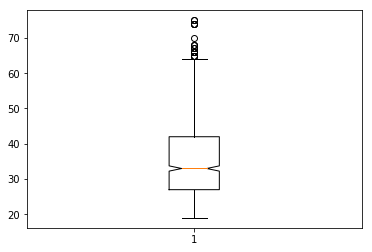

In [36]:
matplotlib.pyplot.boxplot(credit_card_data['Age (years)'], notch=True)
# hence ages after 65 are considered outliers

In [37]:
age_bins = [18,33,47,61,76]
age_grp = pd.cut(credit_card_data['Age (years)'], age_bins,labels=[1,2,3,4])
age_accepted = pd.cut(credit_card_data[credit_card_data['Creditability']==1]['Age (years)'], age_bins, labels=[1,2,3,4])
credit_card_data['Age_grp'] = age_grp

Text(0,0.5,'rate')

Text(0.5,1,'Creditability based on Age')

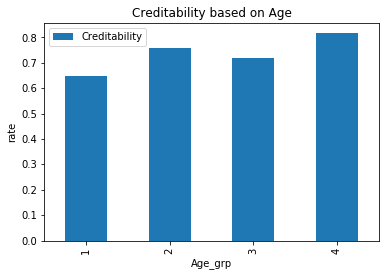

Creditability    0.736004
dtype: float64

In [38]:
age_plot = credit_card_data.pivot_table(index='Age_grp', values="Creditability")
age_plot.plot.bar()
plt.ylabel('rate')
plt.title('Creditability based on Age')
plt.show()
age_plot.mean()

In [39]:
print("The number of cutomers in each Age_grp group")
credit_card_data.groupby(['Age_grp'])[['Age_grp']].count()
print()
age_grpby = credit_card_data.groupby(['Age_grp'])[['Creditability']]
age_grpby.mean()

The number of cutomers in each Age_grp group


,Age_grp
Age_grp,
1,514
2,337
3,111
4,38


,Creditability
Age_grp,
1,0.647860
2,0.759644
3,0.720721
4,0.815789


while age group of customer greater than 60 have the highest creditability
it also has the smallest number of customers in that group and majority of them were outliers

## Concurrent Credits

Text(0,0.5,'rate')

Text(0.5,1,'Concurrent Credits and Creditability')

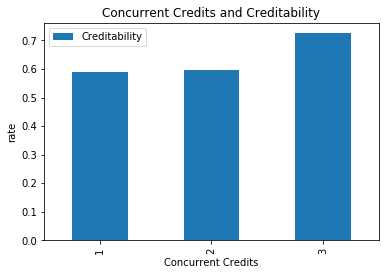

Creditability    0.636829
dtype: float64


The number of cutomers in each Concurrent Credits group


,Concurrent Credits
Concurrent Credits,
1,139
2,47
3,814




                     Creditability
Concurrent Credits               
1                        0.589928
2                        0.595745
3                        0.724816


In [40]:
con_cred_plot = credit_card_data.pivot_table(index='Concurrent Credits', values='Creditability')
con_cred_plot.plot.bar()
plt.ylabel('rate')
plt.title('Concurrent Credits and Creditability')
plt.show()

con_cred_plot.mean()

print()
print("The number of cutomers in each Concurrent Credits group")
credit_card_data.groupby(['Concurrent Credits'])[['Concurrent Credits']].count()
print()

con_cred_grp = credit_card_data.groupby(['Concurrent Credits'])[['Creditability']]
print("\n",con_cred_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a218741d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a21874be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2187d898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a2187d470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a21874320>,
  <matplotlib.lines.Line2D at 0x1a218747b8>]}

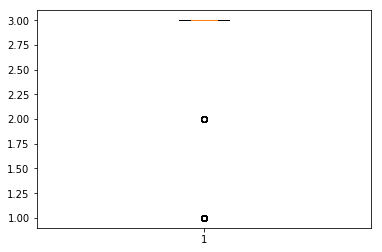

In [41]:
matplotlib.pyplot.boxplot(credit_card_data['Concurrent Credits'], notch=True)

This shows that there are outliers (customers is group 1(bank) and 2(stores)) and the higest creditability rate is for group 3  (no concurrent credit installment plan) 

## Type of apartment

Text(0,0.5,'rate')

Text(0.5,1,'Type of apartment and Creditability')

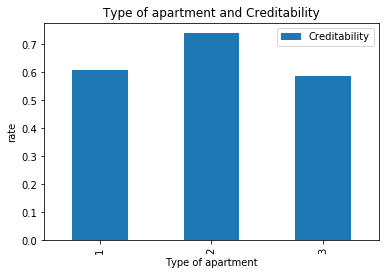

Creditability    0.64574
dtype: float64


The number of cutomers in each Type of apartment group


,Type of apartment
Type of apartment,
1,179
2,714
3,107




                    Creditability
Type of apartment               
1                       0.608939
2                       0.739496
3                       0.588785


In [42]:
apt_plot = credit_card_data.pivot_table(index='Type of apartment', values='Creditability')
apt_plot.plot.bar()
plt.ylabel('rate')
plt.title('Type of apartment and Creditability')
plt.show()

apt_plot.mean()

print()
print("The number of cutomers in each Type of apartment group")
credit_card_data.groupby(['Type of apartment'])[['Type of apartment']].count()
print()

apt_grp = credit_card_data.groupby(['Type of apartment'])[['Creditability']]
print("\n",apt_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a216c8860>],
 'caps': [<matplotlib.lines.Line2D at 0x1a216c8358>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a21708e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a21708710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a216c8c18>,
  <matplotlib.lines.Line2D at 0x1a216c8e48>]}

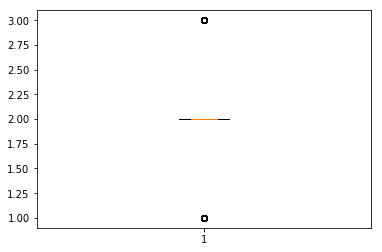

In [43]:
matplotlib.pyplot.boxplot(credit_card_data['Type of apartment'], notch=True)

outliers are the customers in group 1(rent) and 3(for free) majority of the customers own their home which is 73% creditabilty rating.  

## No of Credits at this Bank

Text(0,0.5,'rate')

Text(0.5,1,'No of Credits at this Bank and Creditability')

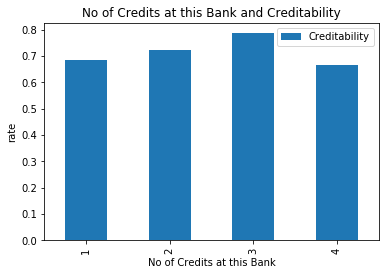

Creditability    0.715037
dtype: float64


The number of cutomers in each No of Credits at this Bank group


,No of Credits at this Bank
No of Credits at this Bank,
1,633
2,333
3,28
4,6




                             Creditability
No of Credits at this Bank               
1                                0.684044
2                                0.723724
3                                0.785714
4                                0.666667


In [44]:
no_cr_bk_plot = credit_card_data.pivot_table(index='No of Credits at this Bank', values='Creditability')
no_cr_bk_plot.plot.bar()
plt.ylabel('rate')
plt.title('No of Credits at this Bank and Creditability')
plt.show()

no_cr_bk_plot.mean()

print()
print("The number of cutomers in each No of Credits at this Bank group")
credit_card_data.groupby(['No of Credits at this Bank'])[['No of Credits at this Bank']].count()
print()

no_cr_bk_grp = credit_card_data.groupby(['No of Credits at this Bank'])[['Creditability']]
print("\n",no_cr_bk_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a205270b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a20534c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a204cfba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a205348d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a205278d0>,
  <matplotlib.lines.Line2D at 0x1101cb860>]}

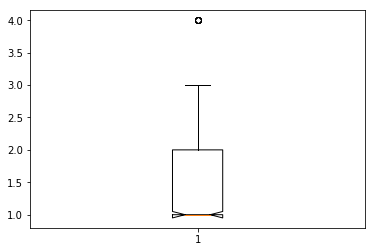

In [45]:
matplotlib.pyplot.boxplot(credit_card_data['No of Credits at this Bank'], notch=True)

customers that 4 existing credits at the bank are outliers and the people with 2 or 3 existing credits have the highest creditabilty rating

## Occupation

Text(0,0.5,'rate')

Text(0.5,1,'Occupation and Creditability')

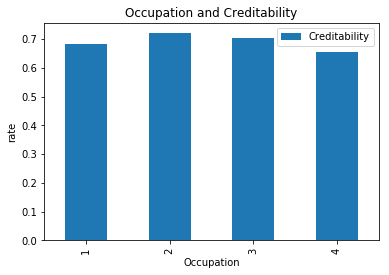

Creditability    0.690496
dtype: float64


The number of cutomers in each Occupation group


,Occupation
Occupation,
1,22
2,200
3,630
4,148




             Creditability
Occupation               
1                0.681818
2                0.720000
3                0.704762
4                0.655405


In [46]:
ocpt_plot = credit_card_data.pivot_table(index='Occupation', values='Creditability')
ocpt_plot.plot.bar()
plt.ylabel('rate')
plt.title('Occupation and Creditability')
plt.show()

ocpt_plot.mean()

print()
print("The number of cutomers in each Occupation group")
credit_card_data.groupby(['Occupation'])[['Occupation']].count()
print()

ocpt_grp = credit_card_data.groupby(['Occupation'])[['Creditability']]
print("\n",ocpt_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a216dd6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a216dd978>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a214e9470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a216ceba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a216dd470>,
  <matplotlib.lines.Line2D at 0x1a216ddda0>]}

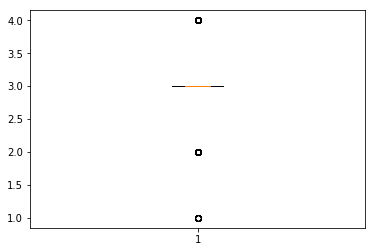

In [47]:
matplotlib.pyplot.boxplot(credit_card_data['Occupation'], notch=True)

outliers exist at every occupation group category that is not 3(skilled employees)
Skilled employes has almost the exact same creditabilty rating as the mean of creditability

## No of dependents

Text(0,0.5,'rate')

Text(0.5,1,'No of dependents and Creditability')

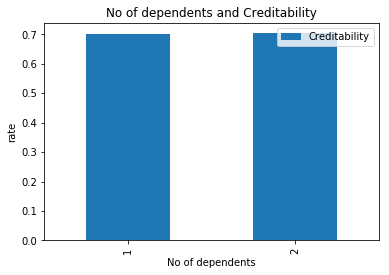

Creditability    0.701317
dtype: float64



                   Creditability
No of dependents               
1                      0.699408
2                      0.703226


In [48]:
dependents_plot = credit_card_data.pivot_table(index='No of dependents', values='Creditability')
dependents_plot.plot.bar()
plt.ylabel('rate')
plt.title('No of dependents and Creditability')
plt.show()

dependents_plot.mean()

print()
dependents_grp = credit_card_data.groupby(['No of dependents'])[['Creditability']]
print("\n",dependents_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a21afd630>],
 'caps': [<matplotlib.lines.Line2D at 0x1a21b06080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a21b06cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a21b068d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a21afd780>,
  <matplotlib.lines.Line2D at 0x1a21afdc18>]}

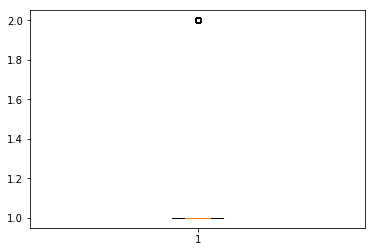

In [49]:
matplotlib.pyplot.boxplot(credit_card_data['No of dependents'], notch=True)

customers with 2 dependents are outliers

Number of Dependents have no effect of creditability. Same valuabilty as creditability. and number of dependents have the same rate.

## Telephone

Text(0,0.5,'rate')

Text(0.5,1,'Telephone and Creditability')

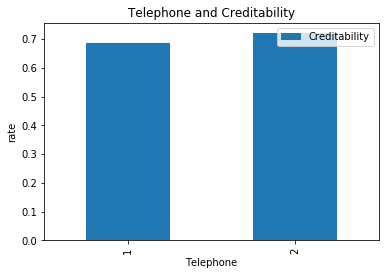

Creditability    0.703269
dtype: float64


The number of cutomers in each Telephone group


,Telephone
Telephone,
1,596
2,404




            Creditability
Telephone               
1               0.686242
2               0.720297


In [50]:
phone_plot = credit_card_data.pivot_table(index='Telephone', values='Creditability')
phone_plot.plot.bar()
plt.ylabel('rate')
plt.title('Telephone and Creditability')
plt.show()

phone_plot.mean()

print()
print("The number of cutomers in each Telephone group")
credit_card_data.groupby(['Telephone'])[['Telephone']].count()
print()

phone_grp = credit_card_data.groupby(['Telephone'])[['Creditability']]
print("\n",phone_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a21d02dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a21d0b828>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a21d114e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a21d110b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a21d02f28>,
  <matplotlib.lines.Line2D at 0x1a21d0b400>]}

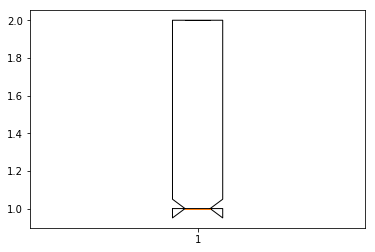

In [51]:
matplotlib.pyplot.boxplot(credit_card_data['Telephone'], notch=True)

Telephone has the same creditability mean as just creditablilty.
No variation in the whether the person had a telephone or not

## Foreign Worker

Text(0,0.5,'rate')

Text(0.5,1,'Foreign Worker and Creditability')

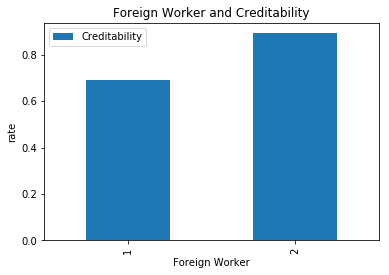

Creditability    0.79226
dtype: float64


The number of cutomers in each Foreign Worker group


,Foreign Worker
Foreign Worker,
1,963
2,37




                 Creditability
Foreign Worker               
1                    0.692627
2                    0.891892


In [52]:
foreign_worker_plot = credit_card_data.pivot_table(index='Foreign Worker', values='Creditability')
foreign_worker_plot.plot.bar()
plt.ylabel('rate')
plt.title('Foreign Worker and Creditability')
plt.show()

foreign_worker_plot.mean()

print()
print("The number of cutomers in each Foreign Worker group")
credit_card_data.groupby(['Foreign Worker'])[['Foreign Worker']].count()
print()

foreign_worker_grp = credit_card_data.groupby(['Foreign Worker'])[['Creditability']]
print("\n",foreign_worker_grp.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x1a21fea668>],
 'caps': [<matplotlib.lines.Line2D at 0x1a21ff10b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a21ff1d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a21ff1908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a21fea7b8>,
  <matplotlib.lines.Line2D at 0x1a21feac50>]}

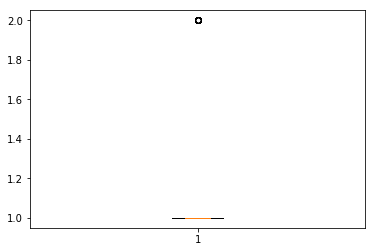

In [53]:
matplotlib.pyplot.boxplot(credit_card_data['Foreign Worker'], notch=True)

Customers that are not foreign workers are the minority of the dataset and is and outlier.
Which means Foreign Workers make up most of the customers 
and the mean is almost exactly the same as the creditability mean,
Hence Foreign Workers data has very little influence on the decision of good or bad credit

### Deleting columns of least significance

In [54]:
credit_card_data.drop(['Duration in Current address','No of dependents','Telephone'], axis=1, inplace=True)

## Determining important attributes through correlation analysis and visualization

In [198]:
credit_card_data.corr()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,Foreign Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,0.025137,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.082079
Account Balance,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.035187
Duration of Credit (month),-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.134680
Payment Status of Previous Credit,0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.028554
Purpose,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.113244
Credit Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.030662
Value Savings/Stocks,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.010450
Length of current employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.022845
Instalment per cent,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.094762
Sex & Marital Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.073103


### Understanding the correlations
As shown above the Account Balance has the highest correlation with the Credibility with 0.35 and type of apartment has the least correlation with Credibility of 0.018<br><br>
looking at the attribute correlation is credit Amt and Duration have the highest correlation among the attributes. when designing the regression models it is important to have the independent variable not highly correlated with each other as this will attribute to multicollinearity

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'random', 'power', 'linalg', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


([<matplotlib.axis.XTick at 0x1a1be224a8>,
 <a list of 18 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1a1bddf828>,
 <a list of 18 Text yticklabel objects>)

Text(0.5,0.98,'Credit Cart Correlations Heat Map')

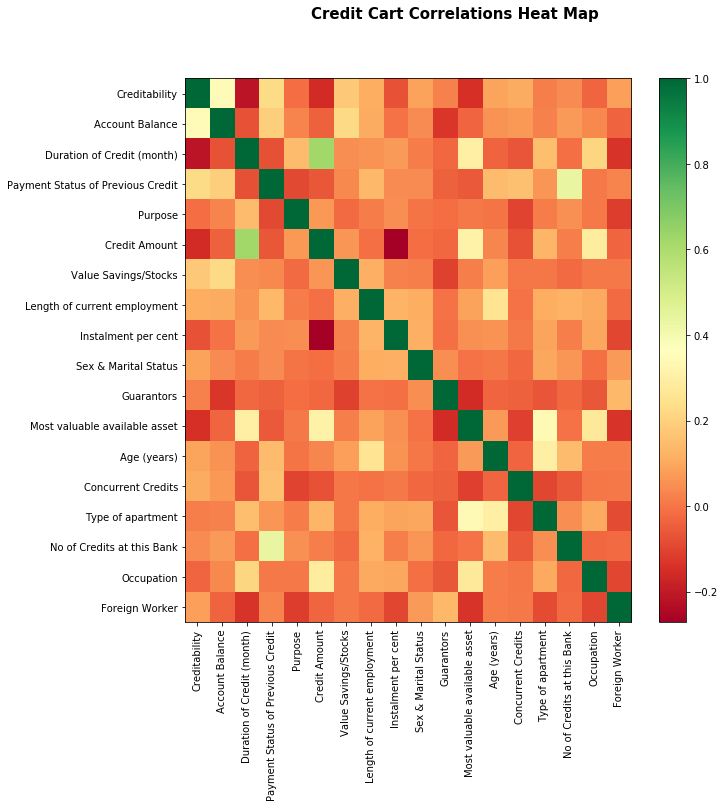

In [64]:
corr = credit_card_data.corr()
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Credit Cart Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

### From the heat map and the correlation chart there is very little correlation against creditability. the highest is .35 correlation  with Account Balance and creditabilty and the least correlated is purpose with -0.017

we deleted Telephone and Dependency. Because there is very little correlation between any of the columns and Creditbilty these columns have very little variation between the values found within the columns.

## Principal Component Analysis and Visualization

In [65]:
from sklearn.preprocessing import StandardScaler
#this is incase you want to create a standardized dataframe for machine learning
# Separating out the features
x = credit_card_data.iloc[: , 1:21].values
# Separating out the target
y = credit_card_data.loc[: , ['Creditability']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Standardizing the data was completed above in order to unify the results. This is done by imagining the mean of the whole dataframe as '0' 

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [69]:
pca_df = pd.concat([principalDf, credit_data[['Creditability']]], axis = 1)
pca_df.head()

,principal component 1,principal component 2,Creditability
0,-1.300073,-1.969803,1
1,-1.644610,-0.037089,1
2,-2.178927,-1.937422,1
3,-2.773076,0.086741,1
4,-2.049872,0.785278,1


We now have a dataset with only 2 procipal component, in other words we shrink the dimensionaliy of the dataset to 2 dimensions. this will help with plotting but we understand the most of the variance is not retained as 2 dimensions is not the optimal size fo 95% variance

Text(0.5,0,'Principal Component 1')

Text(0,0.5,'Principal Component 2')

Text(0.5,1,'2 component PCA')

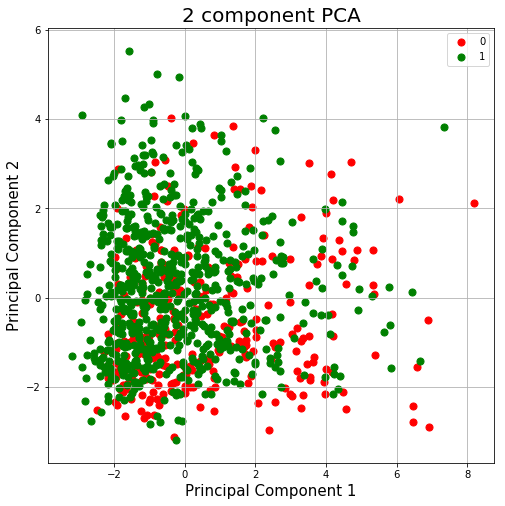

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['Creditability'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### The information above shows no discernible clusters, this means that indvidual attributes are not easily identifiable - We however proceed and try to use this method to assist with our some of our predictive models 

# Machine Learning and Predictive Models

## 1 - Decision Tree
training one model on the training set using the entire feature set and evaluating its performance

In [55]:
from sklearn import tree
X = credit_card_data[["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks",
                     "Length of current employment", "Instalment per cent", "Sex & Marital Status",
                     "Guarantors", "Most valuable available asset", "Concurrent Credits", "Type of apartment",
                     "No of Credits at this Bank", "Occupation", "Foreign Worker",
                     "Credit Duration", "Credit Amount Grp", "Age_grp"]]
Y = credit_card_data['Creditability']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [63]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [64]:
predicted = clf.predict(X_test)

In [65]:
pred_correct = np.sum(Y_test  == predicted)

In [66]:
pred_correct/Y_test.count()

0.695

In [67]:
clf.score(X_test,Y_test)

0.695

so out if 200 test values whne using all attrubitutes and the random sample = 0 
you have roughly 70% accuarcy in this performance of the model. which is the almost the same probability that the creditibiliy is given. in the cell below is the performance accuracy of the baseline model using 10 KFold.

In [70]:
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import model_selection


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
scoring = 'accuracy'
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(clf, X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('Baseline Decision Tree accuracy', cv_results.mean(), cv_results.std())
print(msg)

Baseline Decision Tree accuracy: 0.677500 (0.039843)


### Decision tree with PCA

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
from sklearn.decomposition import PCA
pca=PCA(.85)

In [82]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [84]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [215]:
predicted = clf.predict(X_test)

In [85]:
clf.score(X_test,Y_test)

0.69

### Decision Tree with just the highest correlated attribute (Account Balance)

In [86]:
X = credit_card_data[["Account Balance"]]
Y = credit_card_data['Creditability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# Re-run using optimum neighbor value# Re-ru 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(Y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model is equal to 66.0 %.


### Decision Tree using the 2 highest correlated columns with Creditability

In [87]:
X = credit_card_data[["Account Balance","Payment Status of Previous Credit","Credit Duration"]]
Y = credit_card_data['Creditability']

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [89]:
# Re-run using optimum neighbor value#
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(Y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model is equal to 72.5 %.


In [90]:
X = credit_card_data[["Account Balance","Payment Status of Previous Credit"]]
Y = credit_card_data['Creditability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# Re-run using optimum neighbor value# Re-ru 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(Y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model is equal to 73.5 %.


this has the highest accuracy out of all Decision Tree Regression models

## 2 - Naive Bayes

In [73]:
nb = GaussianNB()
X = credit_card_data[["Account Balance"]]
Y = credit_card_data['Creditability']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Fitting the training set
nb.fit(X_train, Y_train) 

#Predicting for the Test Set
predict = nb.predict(X_test)

nb.score(X_test,Y_test)
# Evaluate accuracy
accuracy = accuracy_score(Y_test, predict)*100
print('Accuracy of NB model is equal to ' + str(round(accuracy, 2)) + ' %.')

GaussianNB(priors=None)

0.71

Accuracy of NB model is equal to 71.0 %.


In [75]:
# with the two higest correlated attributes to creditability
nb = GaussianNB()
X = credit_card_data[["Account Balance","Payment Status of Previous Credit"]]
Y = credit_card_data['Creditability']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Fitting the training set
nb.fit(X_train, Y_train) 

#Predicting for the Test Set
predict = nb.predict(X_test)

nb.score(X_test,Y_test)
# Evaluate accuracy
accuracy = accuracy_score(Y_test, predict)*100
print('Accuracy of NB model is equal to ' + str(round(accuracy, 2)) + ' %.')

GaussianNB(priors=None)

0.765

Accuracy of NB model is equal to 76.5 %.


## 3 - K Nearest Neighbor

In [93]:
# X = Duration of Credit, Payment Status of Previous Credit
X = np.array(credit_card_data.iloc[:,[2,3]])
y = np.array(credit_card_data.iloc[:,0])

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Accuracy of model is equal to 70.0 %.


In [96]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross validation
mylist = list(range(1,200,2))
cv_scores = []
for k in mylist:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Text(0.5,1,'The optimal number of neighbors')

Text(0.5,0,'Number of Neighbors K')

Text(0,0.5,'Misclassification Error')

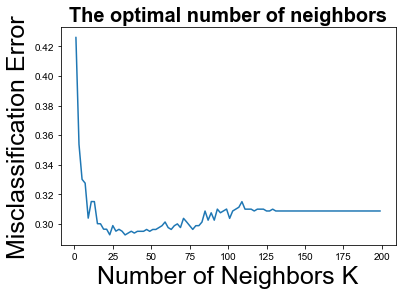

In [97]:
# Plot Misclassification Error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=25)
plt.ylabel('Misclassification Error', fontsize=25)
sns.set_style("whitegrid")
plt.plot(mylist, MSE)
plt.show()

In [98]:
# Re-run using optimum neighbor value
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of model is equal to ' + str(round(accuracy, 2)) + ' %.')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')

Accuracy of model is equal to 74.5 %.


## 4 - Random Forest

In [99]:
X = credit_card_data.iloc[: , 1:8].values
#This was decided after mulitple testing and this provides the best accuaracy
Y = np.reshape(credit_card_data['Creditability'].values, (1,np.product(credit_card_data['Creditability'].shape)))[0]
#Reshaping to 1D array as this is a requirement of the classifier
seed = 4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, Y_train)
pred_clf = clf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
clf.score(X_test, Y_test)

0.7575757575757576

### Our most accurate model is the Random Forest and Naive Bayes both with 76% accuracy rating. We opted out from using standardization and PCA with this model as it works better with random variables.
### The teaking was of the parameters and n_estimator was done via trial and error, this was the best possible outcome.